In [15]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline

# Paths

In [2]:
pageviews_dir = "../data/pageviews/"

In [7]:
df_8 = pd.read_csv(pageviews_dir+"2008"+".csv")
df_9 = pd.read_csv(pageviews_dir+"2009"+".csv")
df_10 = pd.read_csv(pageviews_dir+"2010"+".csv")
df_11 = pd.read_csv(pageviews_dir+"2011"+".csv")
df_12 = pd.read_csv(pageviews_dir+"2012"+".csv")
df_14 = pd.read_csv(pageviews_dir+"2014"+".csv")
df_13 = pd.read_csv(pageviews_dir+"2013"+".csv")
df_16 = pd.read_csv(pageviews_dir+"2016"+".csv")

In [9]:
df_8.head()

,name_q,name_u,views
0,%27Abd_al-Ilah,'Abd_al-Ilah,55.0
1,%C3%81ine_Brady,Áine_Brady,646.0
2,%C3%81kos_Birtalan,Ákos_Birtalan,543.0
3,%C3%81lvaro_Alsogaray,Álvaro_Alsogaray,694.0
4,%C3%81lvaro_Ara%C3%BAjo_Castro,Álvaro_Araújo_Castro,697.0


C:\Users\vujovisn\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


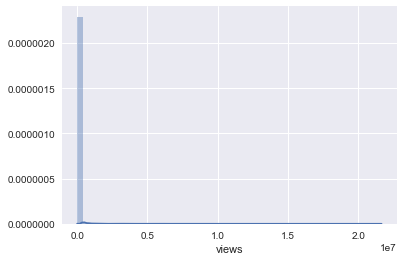

In [13]:
sns.distplot(df_8.views)

In [16]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

In [19]:
df_lst = [df_8,df_9, df_10, df_11, df_12, df_13, df_14, df_16]
df_dict = {
    2008 : df_8,
    2009 : df_9,
    2010 : df_10,
    2011: df_11,
    2012: df_12,
    2013: df_13,
    2014: df_14,
    2016: df_16
}

# Inequaly distributed:

In [32]:
for year,df in df_dict.items():
    print("GINI {} : {}".format(year, gini(df['views'].values.astype(float))))

GINI 2008 : 0.8979029110518093
GINI 2009 : 0.8958330827706914
GINI 2010 : 0.866134537756055
GINI 2011 : 0.8871964944220658
GINI 2012 : 0.8844797518792556
GINI 2013 : 0.8855313907582936
GINI 2014 : 0.8586170734729023
GINI 2016 : 0.8856628413602134


In [30]:
df_9.dtypes

name_q    object
name_u    object
views      int64
dtype: object